# Time Series Analysis with Python 

### Let's start with some questions 

### 1) What is a Time Series?

### 2) What is panel data?

### 3) Patterns in a Time Series

### 4) Additive and multiplicative Time Series

### 5) How to decompose a Time Series into its components?

### 6) Stationary and non-stationary Time Series

### 7) How to make a Time Series stationary?

### 8) How to test for stationarity?

### 9) How to detrend a Time Series?

### 10) What is moving average in time series?

### 11) What is autocorrelation and partial autocorrelation functions?





## 1. What is a Time Series?

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.



## 2.What is panel data?

Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.



## 3. Patterns in a time series

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

**Base level:** this is the mean value of time-series data

A **trend** is observed when there is an increasing or decreasing slope observed in the time series.

Whereas **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

## 4. Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

## 5. How to decompose a time series into its components?

We can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


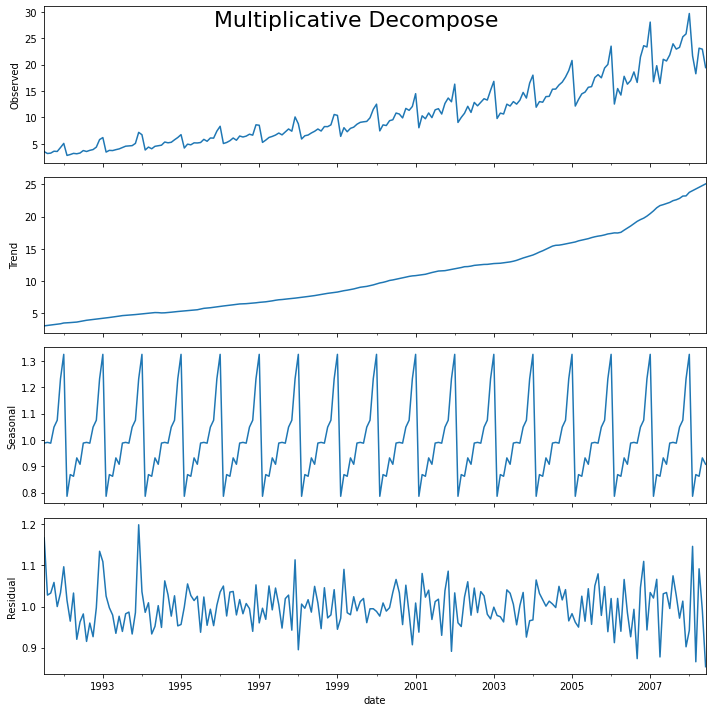

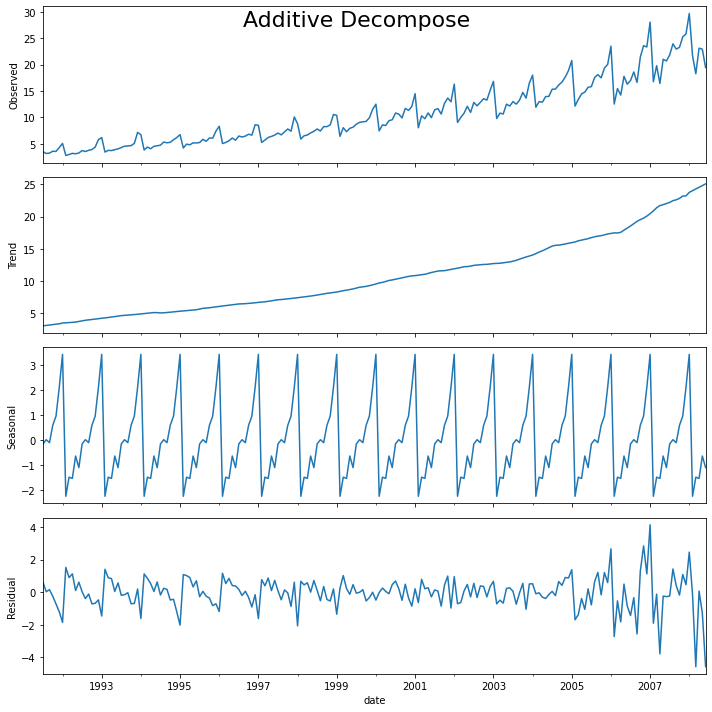

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## 6. Stationary and Non-Stationary Time Series
Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values

A stationary time series id devoid of seasonal effects as well.

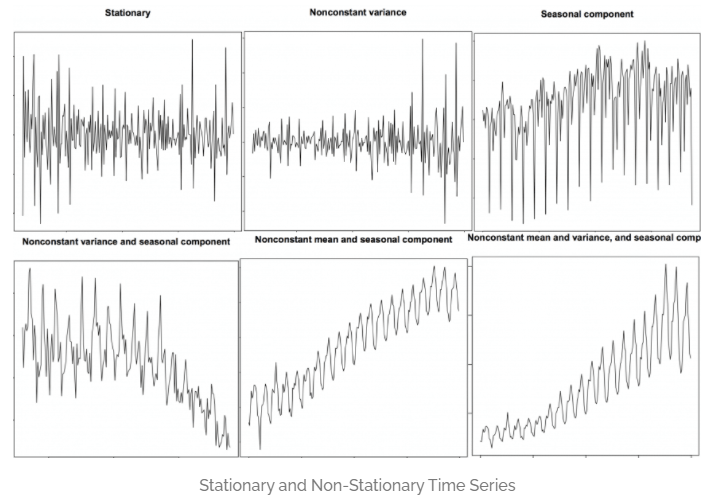

### Why does a stationary series matter?

Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

## 7. How to make a time series stationary?

You can make series stationary by:

Differencing the Series (once or more)

Take the log of the series

Take the nth root of the series

Combination of the above

The most common and convenient method to stationarize the series is by **differencing the series at least once** until it becomes approximately stationary.

## 8.How to test for stationarity?

The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Some Statistical tests are :-

Augmented Dickey Fuller test (ADH Test)

Philips Perron test (PP Test)

The most commonly used is the ADF test

## 9.How to detrend a Time Series?

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

1) Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.

2) Subtract the trend component obtained from time series decomposition we saw earlier.

3) Subtract the mean

4) Power transformation 

5) Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

## 10. What is moving average in time series?

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

 e.g. With a window size of 3, the transformed value at time (t) is calculated as the mean value for the previous 3 observations (t-2, t-1, t), 
as follows:

 obs(t) = 1/3 * (t-2 + t-1 + t)

## 11. What is autocorrelation and partial autocorrelation functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the **residuals** (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’

### Lets See one real life example with Python

In [2]:
# install slim version (default)
!pip install pycaret
# install the full version
#pip install pycaret[full]

     |████████████████████████████████| 288 kB 4.3 MB/s 
     |████████████████████████████████| 1.7 MB 33.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 32.1 MB/s 
     |████████████████████████████████| 6.8 MB 21.5 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 113 kB 53.2 MB/s 
     |████████████████████████████████| 1.3 MB 41.7 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 167 kB 59.4 MB/s 
     |████████████████████████████████| 2.0 MB 38.6 MB/s 
     |████████████████████████████████| 261 kB 56.7 MB/s 
     |████████████████████████████████| 675 kB 48.8 MB/s 
     |████████████████████████████████| 62 kB 617 kB/s 
     |████████████████████████████████| 102 kB 9.2 MB/s 
     |████████████████████

In [3]:
!pip install plotly==4.12
!pip install pyyaml==5.4.1

     |████████████████████████████████| 13.1 MB 4.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 636 kB 4.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


## PyCaret 
PyCaret Regression Module is a supervised machine learning module used for estimating the relationships between a dependent variable (often called the ‘outcome variable’, or ‘target’) and one or more independent variables (often called ‘features’, or ‘predictors’).

### Time Series with PyCaret Regression Module
Time series forecasting can be categorized into the following categories:

1) Classical / Statistical Models — Moving Averages, Exponential smoothing, ARIMA, SARIMA, TBATS

2) Machine Learning — Linear Regression, XGBoost, Random Forest, or any ML model with reduction methods

3) Deep Learning — RNN, LSTM
This tutorial is focused on the second category i.e. Machine Learning.

 ## Dataset
For the purpose of this tutorial, I have used the US airline passengers dataset.

In [4]:
# read csv file
import pandas as pd
data = pd.read_csv('/content/AirPassengers.csv')
data.head()


,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
data.tail()


,Series,Year,Month,Passengers
139,140,1960,8,606
140,141,1960,9,508
141,142,1960,10,461
142,143,1960,11,390
143,144,1960,12,432


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
data.tail()

,Date,Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


## Create 12 month moving average

In [7]:
# create 12 month moving average
data['MA12'] = data['Passengers'].rolling(12).mean()
data.head(15)

,Date,Passengers,MA12
0,1949-01-01,112,NaN
1,1949-02-01,118,NaN
2,1949-03-01,132,NaN
3,1949-04-01,129,NaN
4,1949-05-01,121,NaN
5,1949-06-01,135,NaN
6,1949-07-01,148,NaN
7,1949-08-01,148,NaN
8,1949-09-01,136,NaN
9,1949-10-01,119,NaN


## Plot the data and MA

In [8]:
# plot the data and MA
import plotly.graph_objects as go
import plotly.express as px

# Plot 
fig = px.line(data, x='Date', y='Passengers',template = 'seaborn')

# add moving avg line
fig.add_scatter(x=data['Date'], y=data['MA12'], mode='lines')

# Show plot 
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Since algorithms cannot directly deal with dates, let’s extract some simple features from dates such as **month and year**, and drop the original date column.

In [9]:
import numpy as np
# extract month and year from dates

data['Month'] = [i.month for i in data['Date']]
data['Year'] = [i.year for i in data['Date']]

# create a sequence of numbers

data['Series'] = np.arange(1,len(data)+1)

# drop unnecessary columns and re-arrange

data.drop(['Date', 'MA12'], axis=1, inplace=True)

data = data[['Series', 'Year', 'Month', 'Passengers']] 

# check the head of the dataset
data.head()

,Series,Year,Month,Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121


In [10]:
data.tail()

,Series,Year,Month,Passengers
139,140,1960,8,606
140,141,1960,9,508
141,142,1960,10,461
142,143,1960,11,390
143,144,1960,12,432


## Split data into train-test set

In [11]:

train = data[data['Year'] < 1960]

test = data[data['Year'] >= 1960]

# check shape
train.shape, test.shape


((132, 4), (12, 4))

 ## Initialize Setup

In [12]:
# import the regression module

from pycaret.regression import *

# initialize setup

s = setup(data = train, test_data = test, target = 'Passengers', 
          fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'],
          fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Passengers
2,Original Data,"(132, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 13)"


## Train and Evaluate all Models

In [13]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,22.3980,923.8651,28.2855,0.5621,0.0878,0.0746,0.0300
lr,Linear Regression,22.3981,923.8747,28.2856,0.5621,0.0878,0.0746,1.3733
huber,Huber Regressor,22.4244,892.2573,27.9475,0.5981,0.0880,0.0749,0.0500
br,Bayesian Ridge,22.4783,932.2165,28.5483,0.5611,0.0884,0.0746,0.0233
ridge,Ridge Regression,23.1976,1003.9423,30.0409,0.5258,0.0933,0.0764,0.0267
lasso,Lasso Regression,38.4188,2413.5096,46.8468,0.0882,0.1473,0.1241,0.0200
en,Elastic Net,40.6486,2618.8753,49.4048,-0.0824,0.1563,0.1349,0.0233
omp,Orthogonal Matching Pursuit,44.3054,3048.2658,53.8613,-0.4499,0.1713,0.1520,0.0300
gbr,Gradient Boosting Regressor,50.1217,4032.0567,61.2306,-0.6189,0.2034,0.1538,0.0533
rf,Random Forest Regressor,52.7754,4705.6863,65.6728,-0.7962,0.2148,0.1592,0.2700


The best model based on cross-validated MAE is Least Angle Regression (MAE: 22.3). 

Let’s check the score on the test set.

In [14]:
#prediction_holdout = predict_model(best);

 Let’s plot the actual and predicted lines to visualize the fit.

In [15]:
predictions = predict_model(best, data=data)

# add a date column in the dataset

predictions['Date'] = pd.date_range(start='1949-01-01', end = '1960-12-01', freq = 'MS')

predictions.head()

,Series,Year,Month,Passengers,Label,Date
0,1,1949,1,112,109.884008,1949-01-01
1,2,1949,2,118,108.770838,1949-02-01
2,3,1949,3,132,127.663380,1949-03-01
3,4,1949,4,129,123.391017,1949-04-01
4,5,1949,5,121,124.432493,1949-05-01


In [16]:
predictions.tail()

,Series,Year,Month,Passengers,Label,Date
139,140,1960,8,606,604.306258,1960-08-01
140,141,1960,9,508,535.280098,1960-09-01
141,142,1960,10,461,474.989789,1960-10-01
142,143,1960,11,390,421.695132,1960-11-01
143,144,1960,12,432,472.629817,1960-12-01


## Plot 

In [17]:
# generate predictions on the original dataset

predictions = predict_model(best, data=data)

# add a date column in the dataset

predictions['Date'] = pd.date_range(start='1949-01-01', end = '1960-12-01', freq = 'MS')

# line plot

fig = px.line(predictions, x='Date', y=["Passengers", "Label"], template = 'seaborn')

# add a vertical rectange for test-set separation

fig.add_vrect(x0="1960-01-01", x1="1960-12-01", fillcolor="green", opacity=0.35, line_width=0)

fig.show()

In [18]:
final_best = finalize_model(best)

## Create a future forecasting dataset

Now that we have trained our model on the entire dataset (1949 to 1960), let’s predict five years out in the future through 1964.

In [19]:
future_dates = pd.date_range(start = '1961-01-01', end = '1965-01-01', freq = 'MS')

future_df = pd.DataFrame()

future_df['Month'] = [i.month for i in future_dates]

future_df['Year'] = [i.year for i in future_dates]    

future_df['Series'] = np.arange(145,(145+len(future_dates)))

future_df.head()

,Month,Year,Series
0,1,1961,145
1,2,1961,146
2,3,1961,147
3,4,1961,148
4,5,1961,149


Now, let’s use the future_df to score and generate predictions.

In [20]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,Month,Year,Series,Label
0,1,1961,145,486.278268
1,2,1961,146,482.208186
2,3,1961,147,550.485953
3,4,1961,148,535.187166
4,5,1961,149,538.923776


## Let’s plot it.

In [21]:
concat_df = pd.concat([data,predictions_future], axis=0)

concat_df_i = pd.date_range(start='1949-01-01', end = '1965-01-01', freq = 'MS')

concat_df.set_index(concat_df_i, inplace=True)

fig = px.line(concat_df, x=concat_df.index, y=["Passengers", "Label"], template = 'seaborn')

fig.show()